Name:Smit Bhatt
Internship Task 1
Data Science and Business Analytics Intern at The Sparks Foundation
Predict the percentage of an student based on the no. of study hours.
● What will be predicted score if a student studies for 9.25 hrs/ day?
Dataset link: http://bit.ly/w-data

In [2]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing the Dataset

In [4]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data=pd.read_csv(url)
print("Dataset containing hours and scores of each student")
student_data.head()

Dataset containing hours and scores of each student


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Shape of dataset(dimensions)

In [6]:
student_data.shape

(25, 2)

# Data preprocessing and preparing

In [7]:
student_data.isnull().sum()#identifies if any row or column has null values or no

Hours     0
Scores    0
dtype: int64

In [8]:
#getting information of data
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# getting the description about dataset
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#identifying if any duplicate values
student_data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

# Exploratory Data Analysis

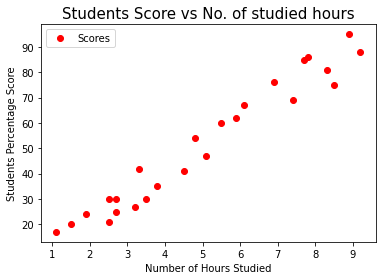

In [11]:
# Visualizing the scatter plot
# Identifiying the Students score based on their spending hours of study

student_data.plot(x='Hours', y='Scores', style="o", c='r')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Students Percentage Score')  
plt.title('Students Score vs No. of studied hours', fontsize=15)  
plt.show()

In [12]:
# devides the data for X(input) and y(output or label)

X = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# splitting data into training and testing set keeping 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,)

In [15]:
#Train the algorithm
reg = LinearRegression()       #initilaizes the model
reg.fit(X_train, y_train)      #fits the model on training datasetset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

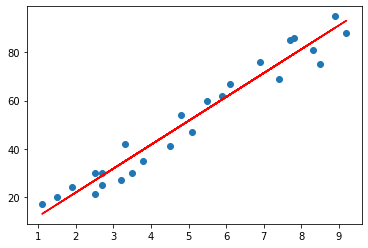

In [16]:
# ploting the regression graph

plane = reg.coef_*X + reg.intercept_
plt.scatter(X,y)
plt.plot(X, plane, color='red')

The data points are very close,hence the dataset has less errors

In [17]:
# printing the coefficients of the line

print(reg.intercept_)
print(reg.coef_)

2.018160041434662
[9.91065648]


In [18]:
print(X_test)
y_pred = reg.predict(X_test)   #Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
# comparing actual versus predicted 

compare = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Q). What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
hour=np.array([9.25])
prediction = reg.predict(hour.reshape(-1,1))
print("No of Hours = {}\n".format(hour))
print("Predicted Score = {}\n".format(prediction))

No of Hours = [9.25]

Predicted Score = [93.69173249]



# Evaluating the model

In [21]:
from sklearn import metrics

In [22]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Absolute Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Absolute Error: 4.647447612100373


In [23]:
# Identifying the accuracy 
reg.score(X,y)

0.9526947647057273